In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

from sklearn.linear_model import LassoCV

from neuropacks import PVC11

%matplotlib inline

In [2]:
pvc = PVC11(data_path='/Users/psachdeva/data/pvc11/data/spikes_gratings/data_monkey1_gratings.mat')

In [14]:
X = pvc.get_design_matrix(form='cbf')
X2 = pvc.get_design_matrix(form='cosine2')
Y = pvc.get_response_matrix(transform='square_root')
angles = pvc.get_design_matrix(form='angle')

In [30]:
neuron = 100

In [31]:
lasso = LassoCV(normalize=True, cv=10)
lasso.fit(X, Y[:, neuron])
lasso2 = LassoCV(normalize=True, cv=10)
lasso2.fit(X2, Y[:, neuron])

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [32]:
x, tuning_curve1 = pvc.get_tuning_curve(
    form='cbf', tuning_coefs=lasso.coef_, intercept=lasso.intercept_
)

x, tuning_curve2 = pvc.get_tuning_curve(
    form='cosine2', tuning_coefs=lasso2.coef_, intercept=lasso2.intercept_
)

(0, 360)

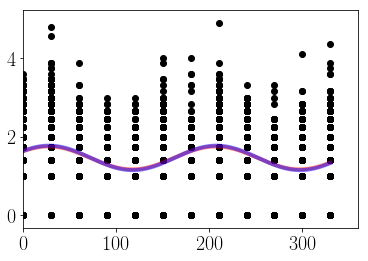

In [33]:
plt.plot(x, tuning_curve1, linewidth=4, color='r', alpha=0.5)
plt.plot(x, tuning_curve2, linewidth=4, color='b', alpha=0.5)
for idx, angle in enumerate(angles):
    plt.scatter(angle, Y[idx, neuron], color='k')
    
plt.xlim([0, 360])

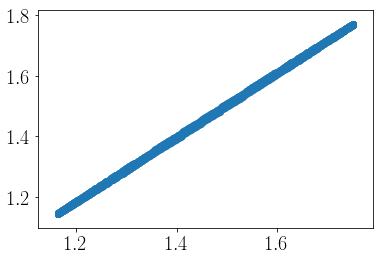

In [36]:
plt.scatter(tuning_curve1, tuning_curve2)

In [35]:
tuning_curve2

array([1.63571947, 1.63866778, 1.64159191, 1.64449147, 1.64736607,
       1.65021534, 1.65303889, 1.65583635, 1.65860735, 1.66135151,
       1.66406848, 1.66675789, 1.66941939, 1.67205262, 1.67465722,
       1.67723287, 1.6797792 , 1.68229589, 1.68478259, 1.68723899,
       1.68966474, 1.69205954, 1.69442305, 1.69675498, 1.699055  ,
       1.7013228 , 1.7035581 , 1.70576059, 1.70792998, 1.71006598,
       1.71216831, 1.71423668, 1.71627083, 1.71827047, 1.72023536,
       1.72216521, 1.72405979, 1.72591883, 1.72774209, 1.72952933,
       1.73128031, 1.73299479, 1.73467255, 1.73631336, 1.73791701,
       1.73948329, 1.74101198, 1.74250288, 1.7439558 , 1.74537054,
       1.74674691, 1.74808473, 1.74938382, 1.75064401, 1.75186514,
       1.75304703, 1.75418953, 1.7552925 , 1.75635577, 1.75737922,
       1.75836271, 1.7593061 , 1.76020927, 1.7610721 , 1.76189448,
       1.76267629, 1.76341743, 1.76411781, 1.76477733, 1.76539589,
       1.76597343, 1.76650987, 1.76700512, 1.76745913, 1.76787

In [27]:
lasso.coef_

array([-0.        , -0.        , -0.40526869, -0.11179564, -0.        ,
        0.        ,  0.        ,  0.04253172,  0.10174823,  0.        ,
        0.        , -0.        , -0.        , -0.05066366, -0.        ,
       -0.        ,  0.        ,  0.        ,  0.02204196,  0.        ])